# NB: May be using variance instead of std. Check in exp. mod.

In [1]:
import numpy as np
import pandas as pd
import statistics as stat

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from operator import itemgetter

sns.set()
%matplotlib inline

# Learning Curve

In [2]:
path_to_figure = ''

learn_avg_test = np.load(
    './../../data_source/results/performance_curves/learning_curve/learning_curve_avg_test.npy'
)
learn_avg_train = np.load(
    './../../data_source/results/performance_curves/learning_curve/learning_curve_avg_train.npy'
)
learn_std_test = np.load(
    './../../data_source/results/performance_curves/learning_curve/learning_curve_std_test.npy'
)
learn_std_train = np.load(
    './../../data_source/results/performance_curves/learning_curve/learning_curve_std_train.npy'
)

learn_avg_test = np.squeeze(np.mean(learn_avg_test, axis=0))
learn_avg_train = np.squeeze(np.mean(learn_avg_train, axis=0))
learn_std_test = np.squeeze(np.mean(learn_std_test, axis=0))
learn_std_train = np.squeeze(np.mean(learn_std_train, axis=0)) 

In [3]:
train_sizes = np.linspace(0.4, 1.0, 37)

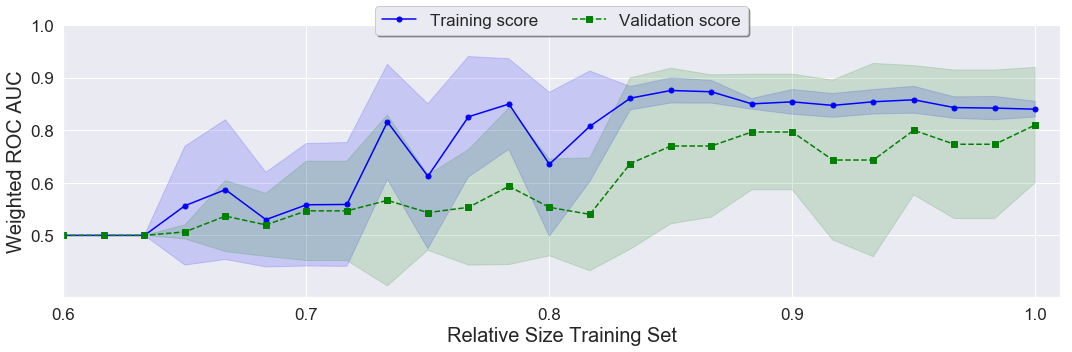

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(
    train_sizes, learn_avg_train, color='blue', marker='o', markersize=5,
    label=f"Training score"
)
plt.plot(
    train_sizes, learn_avg_test, color='green', linestyle='--', marker='s', 
    label=f"Validation score"
)
plt.fill_between(
    train_sizes, learn_avg_train - learn_std_train, learn_avg_train + learn_std_train, 
    alpha=0.15, color='blue'
)
plt.fill_between(
    train_sizes, learn_avg_test - learn_std_test, learn_avg_test + learn_std_test, 
    alpha=0.15, color='green'
)
plt.xlabel('Relative Size of Training Set', fontsize=20)
plt.ylabel('Weighted ROC AUC', fontsize=20)
plt.yticks(np.linspace(0.5, 1, 5), np.round(np.linspace(0.5, 1, 5), 1), fontsize=17)
plt.xticks(np.linspace(0.5, 1, 6), np.round(np.linspace(0.5, 1, 6), 1), fontsize=17)
plt.legend(
    loc='upper center', bbox_to_anchor=(0.5, 1.1),
    ncol=2, fancybox=True, shadow=True, fontsize=17
)
plt.tight_layout()
plt.xlim([0.6, 1.01])

plt.savefig(
    './../../figures/performance_curves/xgb_learning.png',
    bbox_inches='tight',
    dpi=100, 
)

In [8]:
train_sizes[np.where(learn_avg_test == np.max(learn_avg_test))], np.max(learn_avg_test)

(array([1.]), 0.7624999999999995)

In [9]:
learn_avg_test

array([0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
       0.50833333, 0.54583333, 0.525     , 0.55833333, 0.55833333,
       0.58333333, 0.55416667, 0.56666667, 0.61666667, 0.56666667,
       0.55      , 0.67083333, 0.7125    , 0.7125    , 0.74583333,
       0.74583333, 0.67916667, 0.67916667, 0.75      , 0.71666667,
       0.71666667, 0.7625    ])

In [14]:
train_sizes[np.where(np.isclose(learn_avg_test, 0.74583333))]

array([0.88333333, 0.9       ])